In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/dataset_tipologie_attacchi.xlsx'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# Carica il dataset
data = pd.read_excel(file_path)

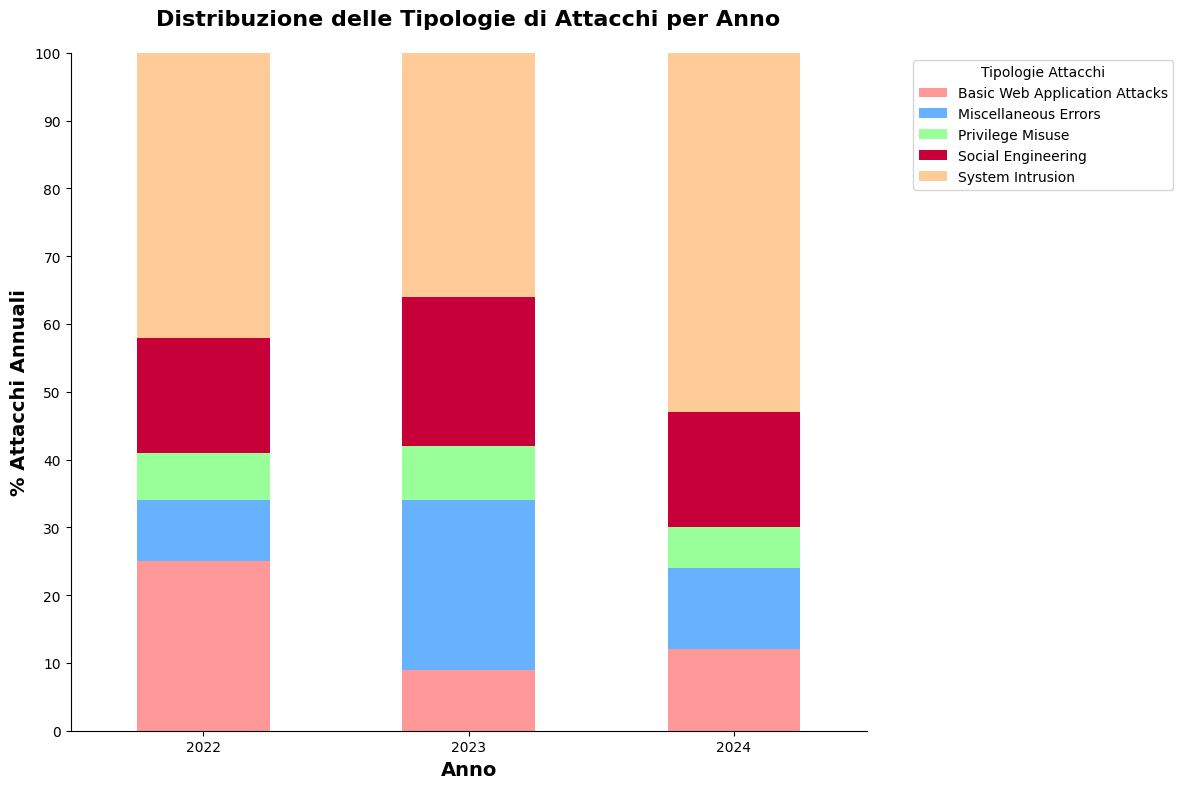

In [4]:
import matplotlib.pyplot as plt

# Prepara i dati per il grafico a barre
data_bar = data.groupby(['Anno', 'Tipologie attacchi'])['% attacchi annuali'].sum().unstack()
data_bar_normalized = data_bar.div(data_bar.sum(axis=1), axis=0) * 100

# Lista di colori personalizzati (escludi "Social Engineering")
custom_colors = [
    '#FF9999',  # Basic Web Application Attacks
    '#66B2FF',  # Miscellanous Errors
    '#99FF99',  # Privilege Misuse
    '#C70039',  # Social Engineering
    '#FFCC99',  # System Intrusion
]

# Crea il grafico a barre
fig, ax = plt.subplots(figsize=(12, 8))
data_bar_normalized.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=custom_colors,
    edgecolor='none'
)

# Personalizza il grafico
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
plt.title(
    'Distribuzione delle Tipologie di Attacchi per Anno',
    fontsize=16,
    pad=20,
    fontweight='bold'
)
plt.xlabel('Anno', fontsize=14, fontweight='bold')
plt.ylabel('% Attacchi Annuali', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# Evidenzia il Social Engineering nella legenda
handles, labels = ax.get_legend_handles_labels()

plt.legend(
    handles,
    labels,
    title='Tipologie Attacchi',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Mostra il grafico
plt.tight_layout()
plt.show()


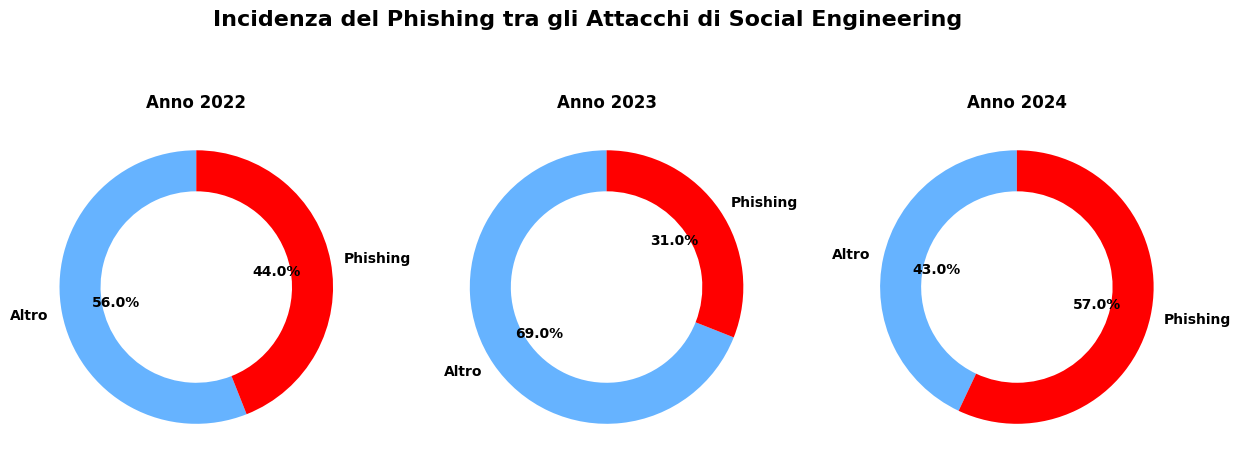

In [5]:
# Filtra i dati per social engineering e phishing
social_engineering = data[data['Tipologie attacchi'] == 'Social Engineering'].copy()
social_engineering['% Phishing'] = social_engineering['%Phishing rispetto al Social Engineering'] * social_engineering['% attacchi annuali']
social_engineering['% Altro'] = social_engineering['% attacchi annuali'] - social_engineering['% Phishing']

# Prepara i dati per il grafico a ciambella
phishing_vs_social = social_engineering[['Anno', '% Altro', '% Phishing']]

# Ordina i dati per anno, a partire dal 2022
phishing_vs_social = phishing_vs_social.sort_values(by='Anno', ascending=True)

# Crea un grafico a ciambella per ogni anno
fig, axes = plt.subplots(1, len(phishing_vs_social), figsize=(15, 5))

# Se c'è solo un anno, axes non sarà un array
if len(phishing_vs_social) == 1:
    axes = [axes]

# Crea un grafico a ciambella per ogni anno
for i, (index, row) in enumerate(phishing_vs_social.iterrows()):
    anno = row['Anno']
    sizes = [row['% Altro'], row['% Phishing']]
    labels = ['Altro', 'Phishing']
    colors = ['#66b3ff', '#ff0000']  # Rosso acceso per il Phishing

    # Crea il grafico a ciambella
    axes[i].pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.3),
        textprops={'fontweight': 'bold'}  # Etichette in grassetto
    )
    axes[i].set_title(f'Anno {int(anno)}', fontweight='bold')  # Titolo in grassetto

# Imposta il titolo generale in grassetto
plt.suptitle(
    'Incidenza del Phishing tra gli Attacchi di Social Engineering',
    fontsize=16,
    y=1.05,
    fontweight='bold'
)

# Mostra il grafico
plt.show()
